## Density-Based Spatial Clustering to Uncover Hidden Irregularities in Nairobi’s Urban Air Pollution

### Ruth Mwende Mavindu 
### Student ID: 169540


Importing the necessary packages

In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

Reading 2023 data from csv files

In [2]:
# Specify the folder path containing the 2023 CSV files
folder_path = 'data'
# Initialize an empty dictionary to store the DataFrames
# Initialize an empty list to store individual DataFrames
df_list = []

for filename in os.listdir(folder_path):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame, specifying the separator as ';'
        df = pd.read_csv(file_path, sep=';')
        
        # Append the DataFrame to the list
        df_list.append(df)

# Merge all DataFrames into one
merged_df = pd.concat(df_list, ignore_index=True)

In [3]:
merged_df.shape

(8852195, 8)

In [4]:
merged_df.head(10)

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:10.706572+00:00,P2,20.6
1,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:10.706572+00:00,P1,22.4
2,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:10.706572+00:00,P0,10.4
3,50,DHT22,3573,-1.289,36.825,2023-11-01T00:00:11.694753+00:00,humidity,99.9
4,50,DHT22,3573,-1.289,36.825,2023-11-01T00:00:11.694753+00:00,temperature,17.9
5,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:42.709249+00:00,P2,14.6
6,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:42.709249+00:00,P1,18.4
7,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:42.709249+00:00,P0,10.4
8,50,DHT22,3573,-1.289,36.825,2023-11-01T00:00:43.479215+00:00,humidity,99.9
9,50,DHT22,3573,-1.289,36.825,2023-11-01T00:00:43.479215+00:00,temperature,17.9


In [5]:
merged_df.describe()

,sensor_id,location,lat,lon,value
count,8.852195e+06,8.852195e+06,8.852195e+06,8.852195e+06,8.852195e+06
mean,1.554073e+02,2.430415e+03,-1.283205e+00,3.681317e+01,1.299241e+02
std,2.369318e+02,1.652643e+03,2.703380e-02,4.909240e-02,2.497621e+03
min,4.900000e+01,7.000000e+00,-1.421000e+00,3.669300e+01,0.000000e+00
25%,5.000000e+01,7.600000e+01,-1.289000e+00,3.678200e+01,1.540000e+01
50%,1.380000e+02,3.573000e+03,-1.289000e+00,3.682500e+01,2.375000e+01
75%,1.600000e+02,3.576000e+03,-1.265000e+00,3.682900e+01,4.475000e+01
max,4.850000e+03,3.626000e+03,-1.239000e+00,3.695300e+01,6.553500e+04


### EDA


In [6]:
#check for missing values

In [7]:
merged_df.isna().sum() 

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
timestamp      0
value_type     0
value          0
dtype: int64

In [8]:
#check for cardinality

In [9]:
merged_df.dtypes

sensor_id        int64
sensor_type     object
location         int64
lat            float64
lon            float64
timestamp       object
value_type      object
value          float64
dtype: object

In [10]:
merged_df['sensor_type'].nunique()

3

In [11]:
merged_df['sensor_type'].unique()

array(['pms5003', 'DHT22', 'SDS011'], dtype=object)

In [12]:
merged_df['sensor_id'].unique()

array([  49,   50,  178,  177,  160,  800,  801,  138,  139,  224,  223,
        174,  173,  176,  175,  140,  141, 4849, 4850,   71,   72,  103,
        104,  158,  159,  792,  793,   87,   88,  944,  945,   52,   51,
       4820, 4821], dtype=int64)

  there is a total of 35 different sensors

In [13]:
#check for the different locations

In [14]:
merged_df['location'].unique()

array([3573, 3612,   74,   35, 3576, 3596,   76, 3579, 3626,    7,   33,
       3580,   77,   37,   78,   27], dtype=int64)

There are 16 different locations

In [15]:
#value types- types of measurements

In [16]:
merged_df['value_type'].unique()

array(['P2', 'P1', 'P0', 'humidity', 'temperature'], dtype=object)

In [17]:
#investigate sensor type = pms5003

In [18]:
sds011_rows = merged_df[merged_df['sensor_type'] == 'pms5003']
sds011_rows

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:10.706572+00:00,P2,20.6
1,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:10.706572+00:00,P1,22.4
2,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:10.706572+00:00,P0,10.4
5,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:42.709249+00:00,P2,14.6
6,49,pms5003,3573,-1.289,36.825,2023-11-01T00:00:42.709249+00:00,P1,18.4
...,...,...,...,...,...,...,...,...
8852187,49,pms5003,3573,-1.289,36.825,2023-02-28T23:55:45.429267+00:00,P1,18.8
8852188,49,pms5003,3573,-1.289,36.825,2023-02-28T23:55:45.429267+00:00,P0,8.4
8852191,49,pms5003,3573,-1.289,36.825,2023-02-28T23:56:17.438376+00:00,P2,12.6
8852192,49,pms5003,3573,-1.289,36.825,2023-02-28T23:56:17.438376+00:00,P1,15.4


Measurements by different sensors

    DHT22 - humidity and temperature
    SDS011 - p1 and p2
    pms5003 - p0, p1 and p2

In [19]:
sensor_type_counts = merged_df["sensor_type"].value_counts().reset_index()
sensor_type_counts.columns = ["sensor_type", "readings_count"]

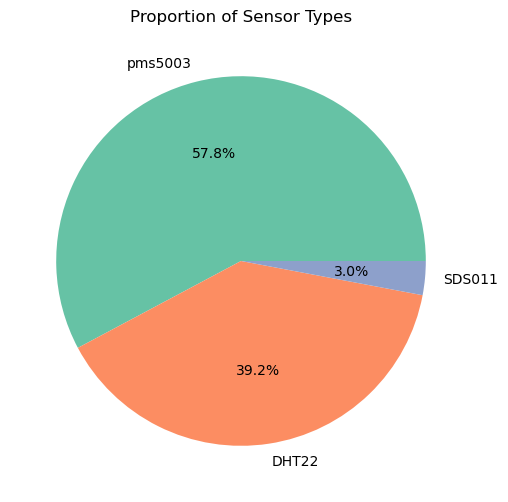

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(sensor_type_counts["readings_count"], labels=sensor_type_counts["sensor_type"], autopct='%1.1f%%', colors=sns.color_palette("Set2"))

plt.title("Proportion of Sensor Types")
plt.show()


In [21]:
#Readings per sensor

In [ ]:

# Filter data for a specific sensor
sensor_50_data = merged_df[merged_df['sensor_id'] == 50]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sensor_50_data['timestamp'], sensor_50_data['value'], label='Sensor 50')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor 5- Values Over Time')
plt.legend()
plt.show()


In [ ]:
#visualize the data for sensor 49

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific sensor
sensor_49_data = merged_df[merged_df['sensor_id'] == 49]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sensor_49_data['timestamp'], sensor_49_data['value'], label='Sensor 49')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor 49 Values Over Time')
plt.legend()
plt.show()

In [ ]:
#visualize the data for sensor 50

In [ ]:
sensor_50_data = merged_df[merged_df['sensor_id'] == 50]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sensor_50_data['timestamp'], sensor_50_data['value'], label='Sensor 50')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor 50 Values Over Time')
plt.legend()
plt.show()

In [ ]:
#reading per sensor

In [ ]:
# Group by sensor_id and value_type, then calculate the mean value

In [ ]:
sensor_stats = merged_df.groupby(['sensor_id', 'value_type'])['value'].mean().reset_index()
sensor_stats.head(20)

In [ ]:
#visualize the sensor locations

In [ ]:
#!pip install folium

In [ ]:
import folium

# Create a base map centered around the mean latitude and longitude
mean_lat = merged_df['lat'].mean()
mean_lon = merged_df['lon'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Add markers for each sensor location
for idx, row in merged_df.drop_duplicates(subset=['sensor_id']).iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Sensor ID: {row['sensor_id']}<br>Type: {row['sensor_type']}",
        tooltip=f"Location {row['location']}"
    ).add_to(m)

# Display the map
m.save('sensor_locations.html')  # Save to an HTML file
m  # Display in a Jupyter Notebook

### Data Preprocessing

In [ ]:
#change TIMESTAMP to datetime

In [ ]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'],format='ISO8601')

# Verify the conversion
print(merged_df['timestamp'].dtype)  # Should output: datetime64[ns]

In [ ]:
#Aggregate the data to 1 hour

In [ ]:
# Floor timestamps to hourly intervals
merged_df["hourly_timestamp"] = merged_df["timestamp"].dt.floor("h")

# Group by relevant columns
hourly_data = merged_df.groupby(
    ["hourly_timestamp", "sensor_id", "sensor_type", "location", "lat", "lon", "value_type"]
).agg(
    readings_count=("value", "count"),  # Number of readings per hour
    avg_value=("value", "mean"),       # Average value per hour
    min_value=("value", "min"),        # Minimum value per hour
    max_value=("value", "max"),        # Maximum value per hour
).reset_index()

# Rename for clarity
hourly_data.rename(columns={"hourly_timestamp": "timestamp"}, inplace=True)

In [ ]:
hourly_data.head()

In [ ]:
hourly_data.shape

### DBSCAN

In [ ]:
performing DBSCAN using P2 

In [ ]:
# Select relevant columns for DBSCAN
hourly_data = hourly_data[hourly_data['value_type'] == 'P2']

# Take a random sample of the data (e.g., 10%)

hourly_data = hourly_data.sample(frac=0.4, random_state=42)
X = hourly_data[['avg_value']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=20)  # Tune these parameters
hourly_data['anomaly'] = dbscan.fit_predict(X_scaled)

# Anomalies are labeled as -1
anomalies = hourly_data[hourly_data['anomaly'] == -1]

# Visualize anomalies over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='timestamp', y='avg_value', hue='anomaly', data=hourly_data, palette='viridis')
plt.title('Hourly Averaged Data with Anomalies Detected by DBSCAN')
plt.xlabel('Timestamp')
plt.ylabel('Average Value')
plt.legend(title='Anomaly')
plt.show()

print("Anomalies detected:")
print(anomalies)